In [23]:
include("validation.jl");

# VALIDATION CASES

## LIFT AND DRAG: Bertin's wing - Planar wing

Planar, 45-deg swept-back wing (Bertin's planar wing in Example 7.2, pp. 343
of Bertin's *Aerodynamics for Engineers*). Verified with Bertin's hand
calculations and validated with experimental data from Weber and Brebner (1958),
*Low-speed tests on 45-deg swept-back wings, part I*, Tables 3 and 4.

<img src="img/bertinswing00.png" alt="Drawing" style="width: 400px;"/>

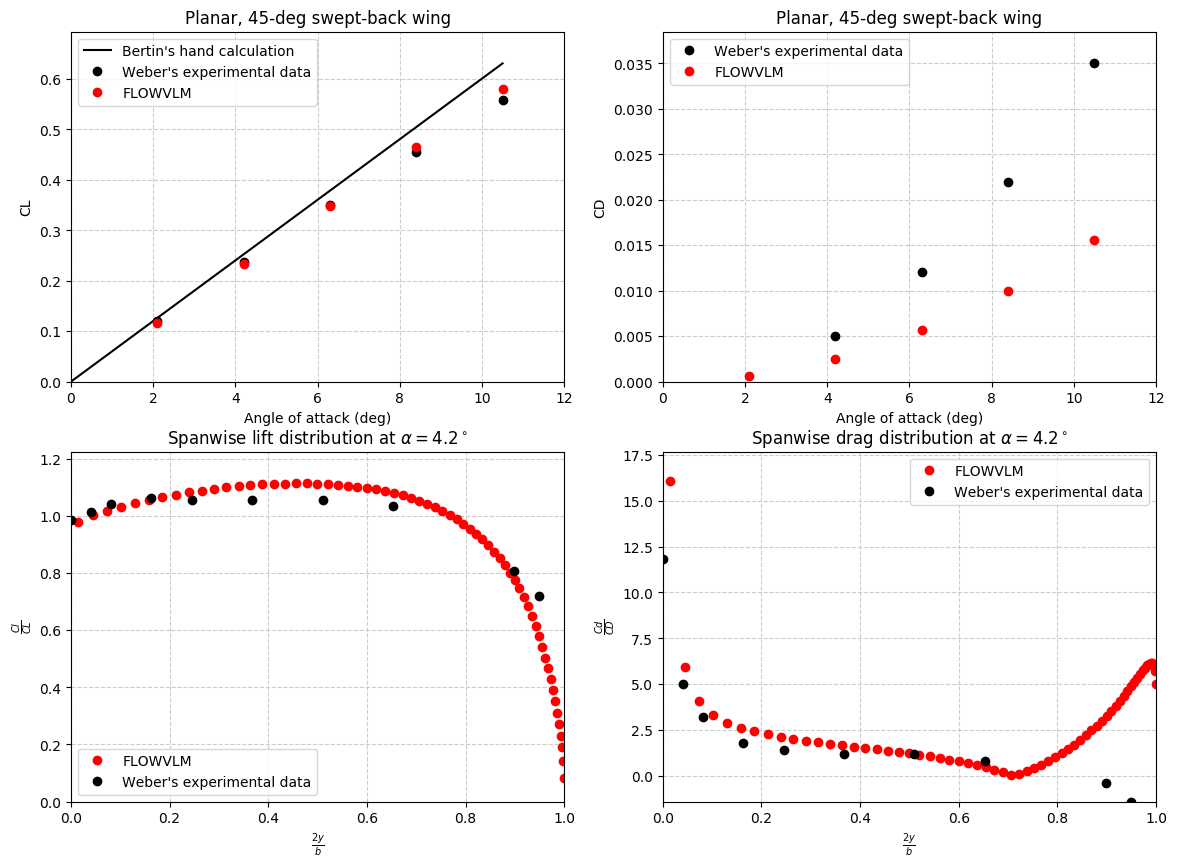

In [3]:
planarWing();

**CONCLUSION:** Lift matches fairly well. Calculating drag through the aerodynamic force on induced velocity is very inaccurate (more accuracy can be achieved by calculating drag through a far-field method and including viscous drag); however, this method allows to predict interactions between multiple lifting surfaces.

## TOTAL MOMENT: Warren 12 - Planar wing

Validation of predicted moment compared to results on a Warren 12 wing
(tappered, swept, flat wing).
For details on this wing, see Validation 3 in *Great OWL Publishing - Surfaces; Vortex
Lattice Module*, pp. 109.


<img src="img/warren1200.png" alt="Drawing" style="width: 600px;"/>

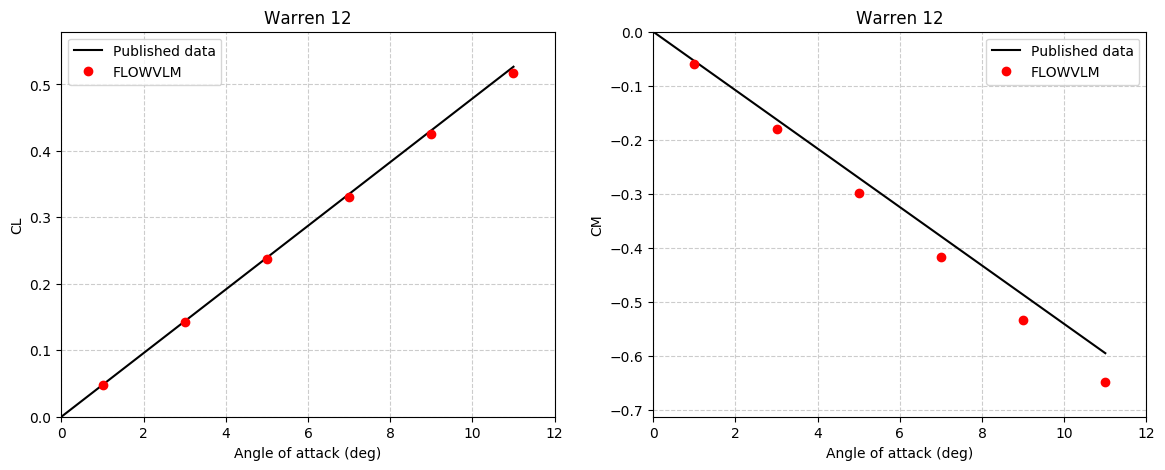

In [4]:
warren12();

## WING PROPERTIES: Taper, sweep, and twist

Validation on different wing properties (taper, sweep, and twist) compared
with experimental data from Anderson's 1940 *Determination of the
characteristics of tapered wings*. The data was captured on a variety of cross-sectional airfoil geometries, but the current formulation of FLOWVLM doesn't
account for airfoil geometry, hence only the symmetric case (wing 00-xx-xx)
can be expected to match. Since there isn't a comparison case of only twist on the symmetric wing, but wings #3 and #7 provide the case of adding twist on a cambered wing, first it will be studied the discrepancy due to airfoil geometry.

Since previous validations are on planar-untwisted wings, this study is
particularly useful to validate the effects of twist.

   
The experimental data was taken on wings with different airfoil sections: Symmetrical (denoted 00), cambered (denoted 24), and reflexed (denoted 2R). This are the wing geometries reported in Anderson's study:

<table>
<tr>
    <td> <figure><img src="img/twisted01.png" width="200px"/><figcaption>#1 (00 airfoil, no sweep, no twist)</figcaption></figure> </td>
    <td> <figure><img src="img/twisted02.png" width="200px"/><figcaption>#2 (24 airfoil, no sweep, no twist)</figcaption></figure> </td>
    <td> <figure><img src="img/twisted03.png" width="200px"/><figcaption>#3 (24 airfoil, 15 sweep, no twist)</figcaption></figure> </td>
</tr>
<tr>
    <td> <figure><img src="img/twisted04.png" width="200px"/><figcaption>#4 (24 airfoil, 30 sweep, no twist)</figcaption></figure> </td>
    <td> <figure><img src="img/twisted05.png" width="200px"/><figcaption>#5 (24 airfoil, 30 sweep, 8.5 twist)</figcaption></figure> </td>
    <td> <figure><img src="img/twisted06.png" width="200px"/><figcaption>#6 (2R airfoil, 15 sweep, 8.5 twist)</figcaption></figure> </td>
</tr>
<tr>
    <td> <figure><img src="img/twisted07.png" width="200px"/><figcaption>#7 (2R airfoil, 15 sweep, no twist)</figcaption></figure> </td>
    <td> <figure><img src="img/twisted08.png" width="200px"/><figcaption>#8 (00 airfoil, 15 sweep, 3.45 twist)</figcaption></figure> </td>
    <td> <figure><img src="img/twisted09.png" width="200px"/><figcaption>#9 (00 airfoil, 15 sweep, 3.45 twist)</figcaption></figure> </td>
</tr>
</table>
(If you are visualizing this on Github, it won't display the pictures of the wings due to failing to process HTML)

### Preliminary study on discrepancy due to airfoil geometry

#### Effects of airfoil geometry (no sweep, no twist)

 
<table>
<tr>
    <td> <figure><img src="img/twisted01.png" width="200px"/><figcaption>#1 (00 airfoil, no sweep, no twist)</figcaption></figure> </td>
    <td> <figure><img src="img/twisted02.png" width="200px"/><figcaption>#2 (24 airfoil, no sweep, no twist)</figcaption></figure> </td>
</tr>
</table>

Wings with two different airfoil sections: Symmetrical (00) and cambered (24). FLOWVLM doesn't account for airfoil properties, so here I am seeing how the code deviates from the effects of airfoil sections. Wing #1 has a symmetrical airfoil section, meanwhile wing #2 is cambered.

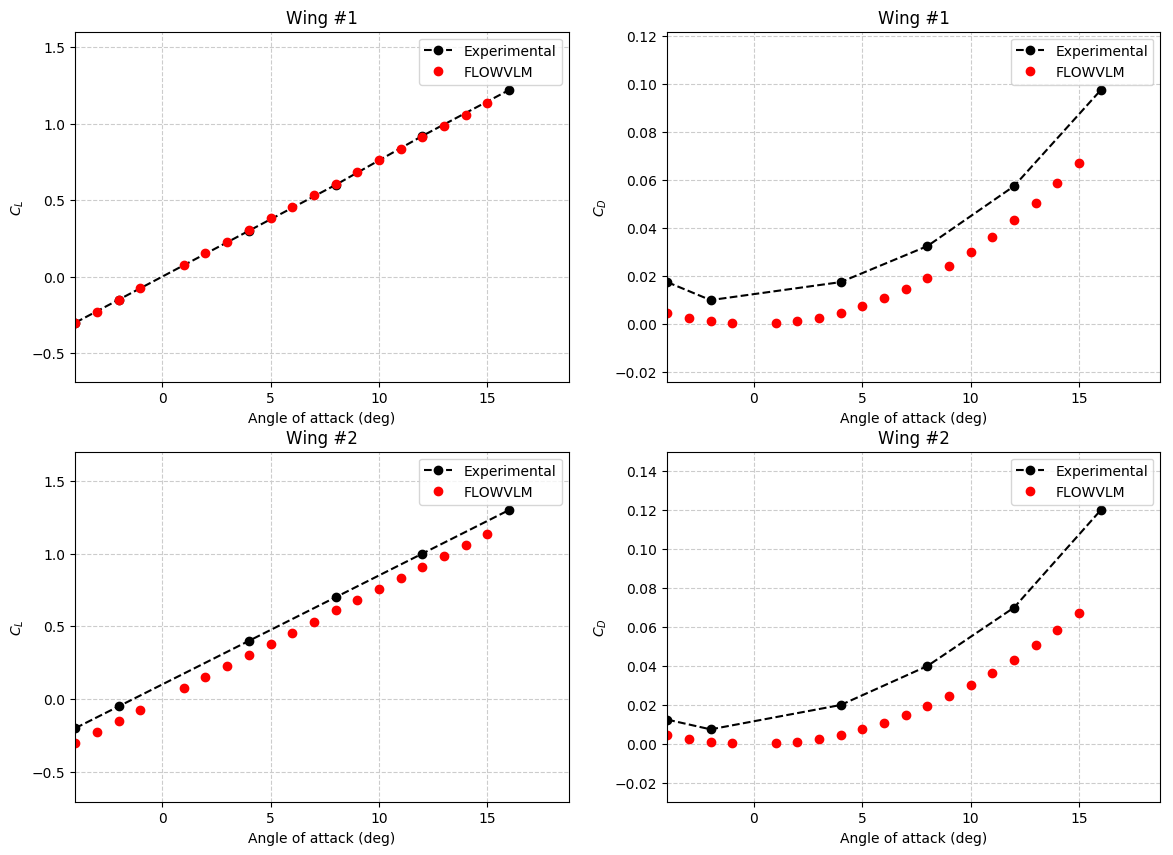

In [18]:
vlm.VLMSolver._mute_warning(true)
twist(; to_calculate=[1,2], n=20);

The lift matches perfectly with the symmetrical, which doesn't have any airfoil-section effects. Noticing that the measured induced drag at $\alpha=0$ for the symmetrical is non-zero, it can be argued that the discrepancy between FLOWVLM's induced drag and the measured is due to frictional drag.

The discrepancy in lift of Wing #2 reflects the discrepancy introduced by airfoil-section effects.

#### Effects of airfoil geometry (with sweep, no twist)

     
<table>
<tr>
    <td> <figure><img src="img/twisted03.png" width="200px"/><figcaption>#3 (24 airfoil, 15 sweep, no twist)</figcaption></figure> </td>
    <td> <figure><img src="img/twisted07.png" width="200px"/><figcaption>#7 (2R airfoil, 15 sweep, no twist)</figcaption></figure> </td>
</tr>
</table>


Wing #3 is cambered, meanwhile Wing #7 is a reflected airfoil. Both at a sweep of $15^\circ$

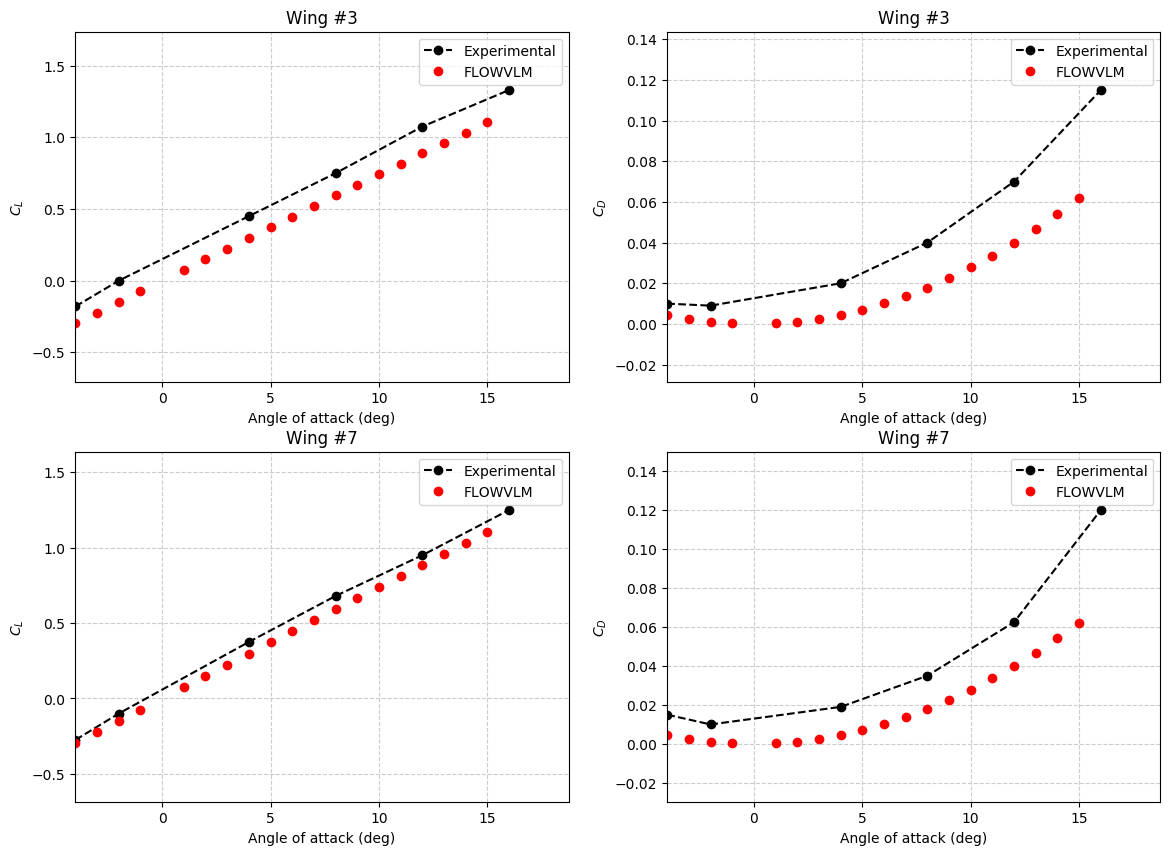

In [19]:
wings = twist(; to_calculate=[3,7], n=100);

Remembering how the predicted lift matched on Wing #1 (no sweep with symmetrical airfoil), and noticing the nearly match with Wing #7 in the bottom left graph, it can be seen that the reflected airfoil (2R) can be closely predicted with FLOWVLM; hence, the effects of twist will be compared on 2R wings.

### Validation on effects of twist


<table>
<tr>
    <td> <figure><img src="img/twisted07.png" width="200px"/><figcaption>#7 (2R airfoil, 15 sweep, no twist)</figcaption></figure> </td>
    <td> <figure><img src="img/twisted06.png" width="200px"/><figcaption>#6 (2R airfoil, 15 sweep, 8.5 twist)</figcaption></figure> </td>
</tr>
</table>

From the preliminary study, it was determined that the 2R airfoil-section has low airfoil-section effects, hence, the effects of twist will be compared on wings #7 and #6, where the first one has no twist (and any discrepancy on #7 is due to airfoil-section) and twist is added in Wing #6 (any discrepancy on this wing must be considered along with the discrepancy seen on #7)

Both Wing #7 and Wing #6 are cambered foils at a sweep of $15^\circ$. Wing #7 has no twist, meanwhile Wing#6 has a twist of $8.5^\circ$ at the tip:

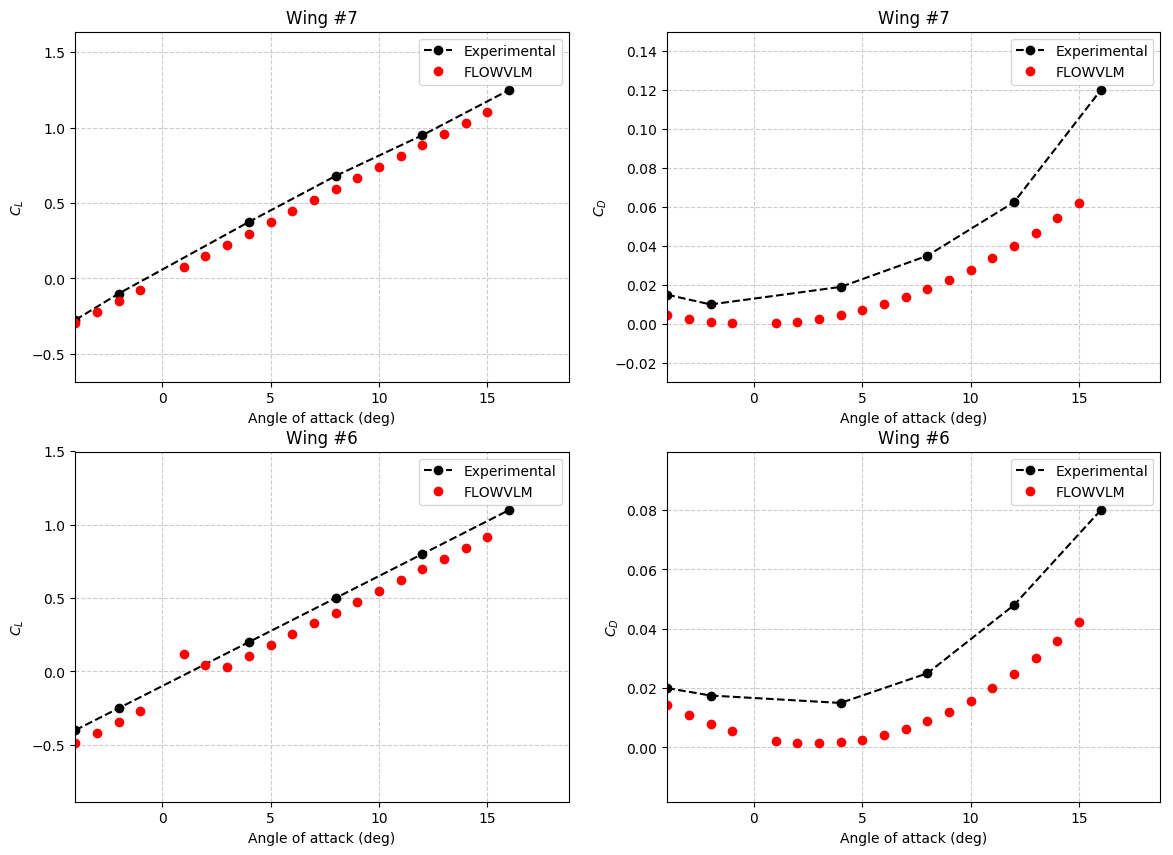

In [17]:
wings = twist(; to_calculate=[7, 6], n=100);

As we already noticed in the comparison of lift curves with different airfoil sections, the discrepancy in lift for both Wing #6 and #7 are due to airfoil properties that MyVLM doesn't account for. Except for the weird behavior as $\alpha \rightarrow 0^\circ$, FLOWVLM predicts the lift with twist fairly accurately.

### BONUS: Effects of tapper ratio


<table>
<tr>
    <td> <figure><img src="img/twisted08.png" width="200px"/><figcaption>#8 (00 airfoil, 15 sweep, 3.45 twist)</figcaption></figure> </td>
    <td> <figure><img src="img/twisted09.png" width="200px"/><figcaption>#9 (00 airfoil, 15 sweep, 3.45 twist)</figcaption></figure> </td>
</tr>
</table>

Both Wings #8 and #9 have symmetrical airfoil sections, same sweep ($15^\circ$), and same twist ($3.45^\circ$ at the tip), but different taper ratios.

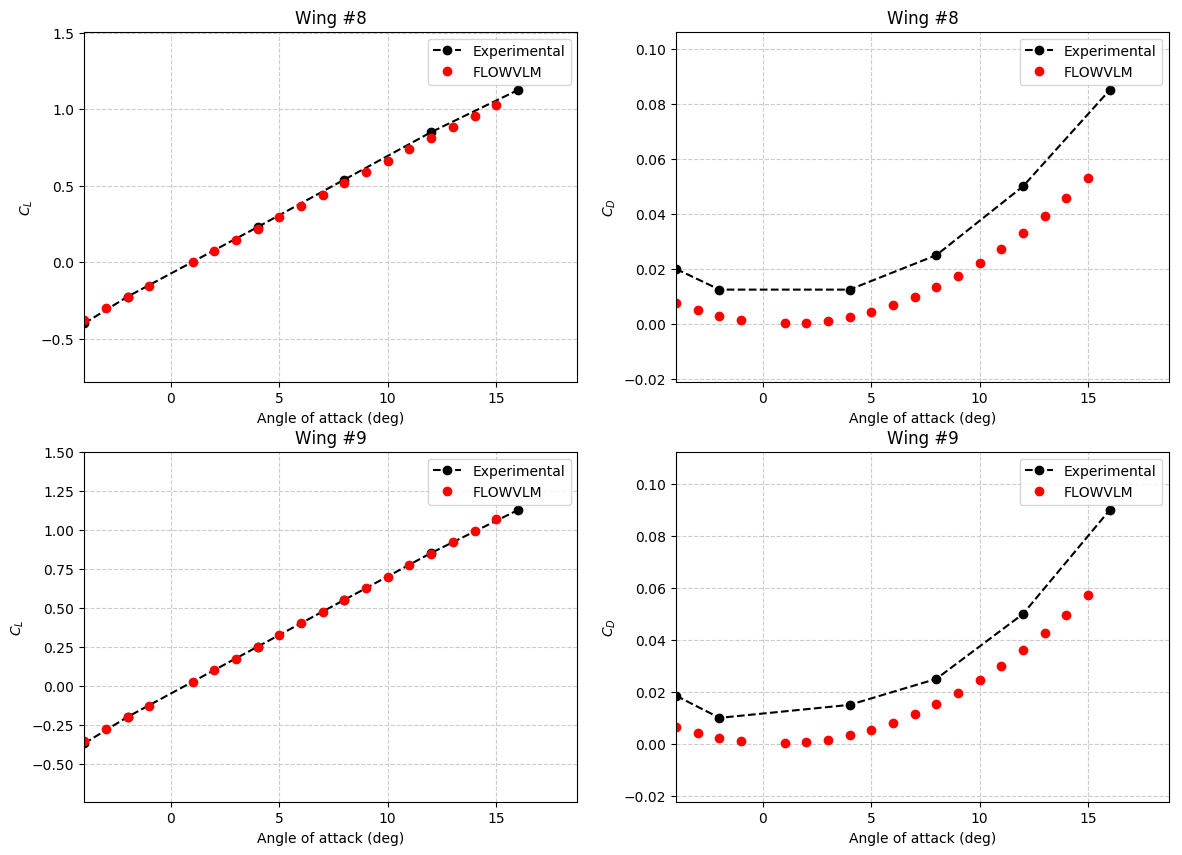

In [20]:
wings = twist(; to_calculate=[8,9], n=100);

Perfect match on the lift.

Regarding the discrepancy on induced drag, remembering that the same discrepancy was present on Wing #1 which had nonzero drag at $\alpha=0^\circ$ even though the wing has no twist, it can be argued that the discrepancy is due to frictional drag (see preliminary analysis).

## UNVALIDATION: Low-Reynolds numbers


Comparison with experimental data on planar wing at low reynolds numbers from
Ananda 2015, *Measured aerodynamic characteristics of wings at low Reynolds
numbers*, Fig 6.

It is expected that the induced drag calculated through FLOWVLM won't match
quite well their measured drag due to predominant viscous effects, hence,
this study is useful for seeing the discrepancy that is introduced by not
accounting for viscous drag.

<img src="img/lowre02.png" width="500px"/>

The lift is close, but the drag is about half off:

EXPERIMENTAL
<img src="img/lowre11.png" alt="Drawing" style="width: 500px;"/>

FLOWVLM

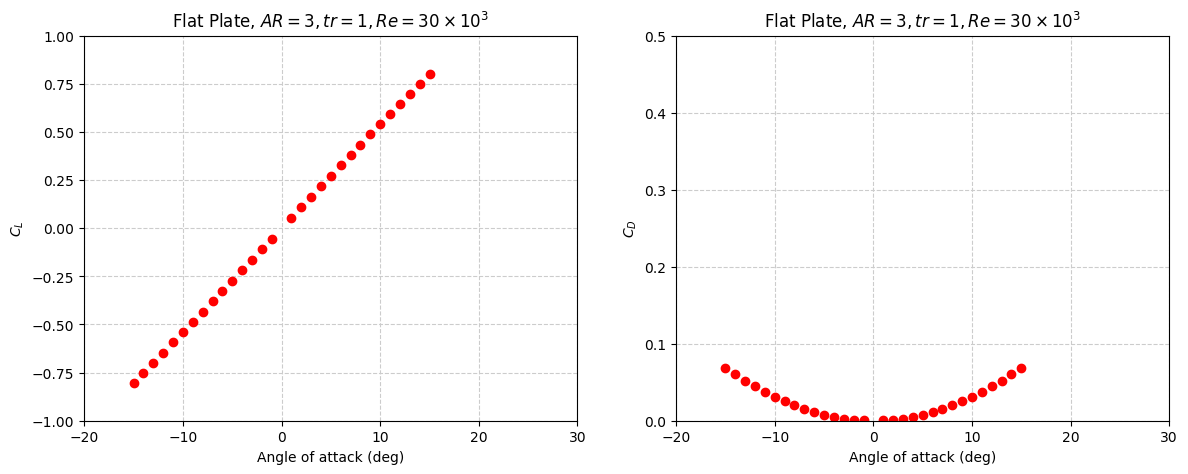

In [24]:
planarwing_lowreynolds();

# VERIFICATION CASES

## Grid dependance

The function `grid_dependance()` in `FLOWVLM_tools.jl` performs an automatic study on aerodynamic characteristics dependance on lattice refinement. The case bellow studies the convergence of Bertin's wing.

Starting n=8 ...
	 Done!
Starting n=16 ...
	 Done!
Starting n=32 ...


	 Done!
Starting n=64 ...
	 Done!
Starting n=128 ...


	 Done!
Starting n=256 ...
	 Done!


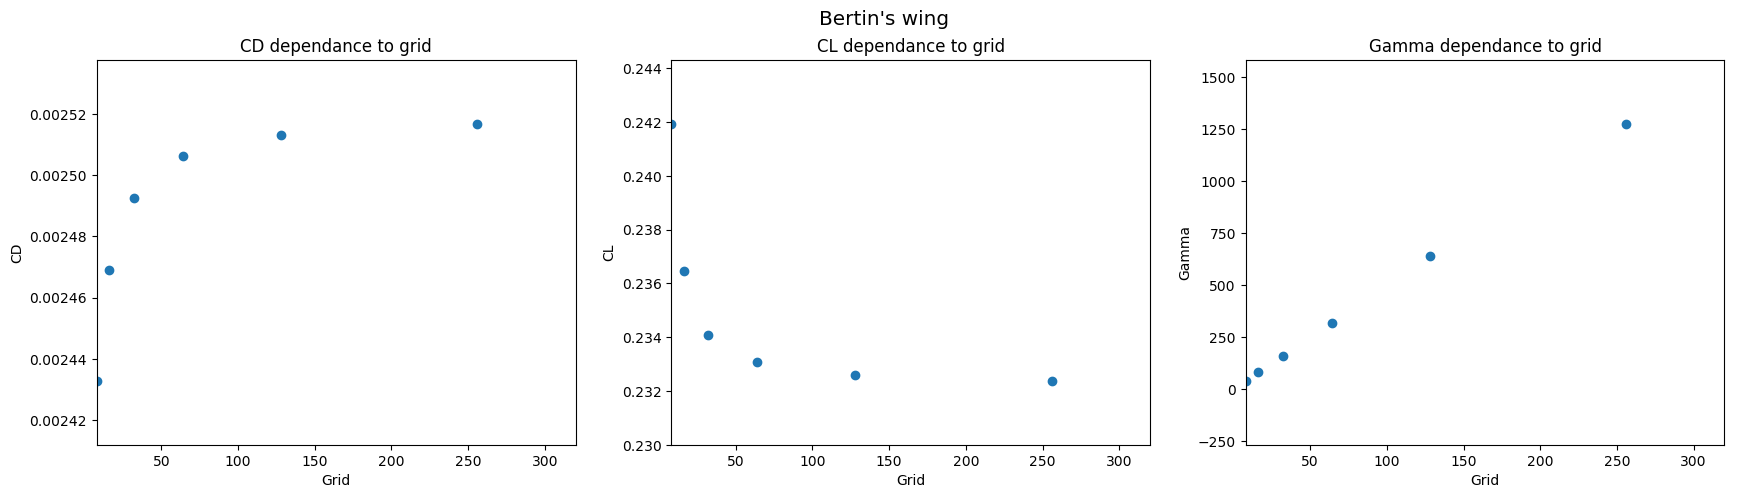

VALUES AT n=256
	CD : 0.0025167462905457414
	CL : 0.23238600684378058
	Gamma : 1274.6604921811975


In [7]:
magVinf = 163*0.3048 # m/s
alpha = 4.2
b=98*0.0254
lambda = 45.0
ar = 5.0
tr = 1.0
gamma = 0.0
twist = 0.0
r = 20.0
central = false

Vinf(X, t) = magVinf*[ cos(alpha*pi/180), 0.0, sin(alpha*pi/180)]

generate_wing(n) = vlm.simpleWing(b, ar, tr, twist, lambda, gamma;
            n=n, r=r, central=central)

vlm.grid_dependance(generate_wing, Vinf; ns=[4*2^i for i in 1:6],
                          fig_title="Bertin's wing");


## LIFT AND DRAG: Planar wing

Comparison with theoretical calculations on two planar wings of sweep 0 and 35.
For details, see Validation 2 in *Great OWL Publishing - Surfaces; Vortex
Lattice Module*, pp. 106. 

It also performs a grid dependance study to determine
dependance of aerodynamic characteristics with lattice refinement.

###### LAMBDA 0.0 #######
------------ GRID CONVERGENCE
Starting n=8 ...
	 Done!
Starting n=16 ...
	 Done!
Starting n=32 ...
	 Done!
Starting n=64 ...
	 Done!
Starting n=128 ...
	 Done!
Starting n=256 ...
	 Done!
VALUES AT n=256
	CD : 0.023181578175393635
	CL : 0.8370520211354049
	Gamma : 2941.1815321535714
------------ GRID CONVERGENCE DONE

	PARAM	THEORETICAL	FLOWVLM		Error
	>CD	0.02491		0.02318		7.5%
	>CL	0.885		0.837		5.7%
	>L	1333.0		1261.0		5.7%
	>D	37.4		34.9		7.0%
###### Done

###### LAMBDA 35.0 #######
------------ GRID CONVERGENCE
Starting n=8 ...
	 Done!
Starting n=16 ...
	 Done!
Starting n=32 ...
	 Done!
Starting n=64 ...
	 Done!
Starting n=128 ...
	 Done!
Starting n=256 ...

	 magsqr:8.523111469067809e-13 
	 A:[1.24898,-1.34842,0.0] 
	 B:[1.24899,-1.34842,1.47296e-6] 
	 C:[1.24899,-1.45726,0.0]


	 Done!
VALUES AT n=256
	CD : 0.01403021943555435
	CL : 0.7166202429071783
	Gamma : 2613.5773982499595
------------ GRID CONVERGENCE DONE


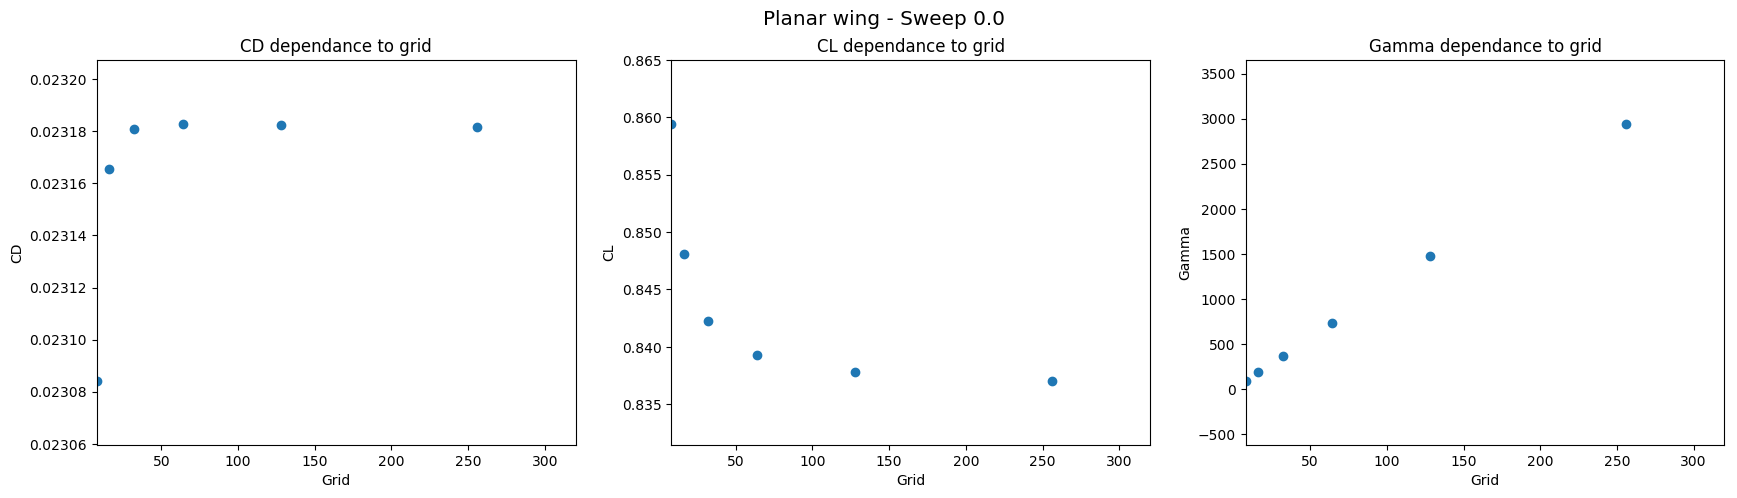

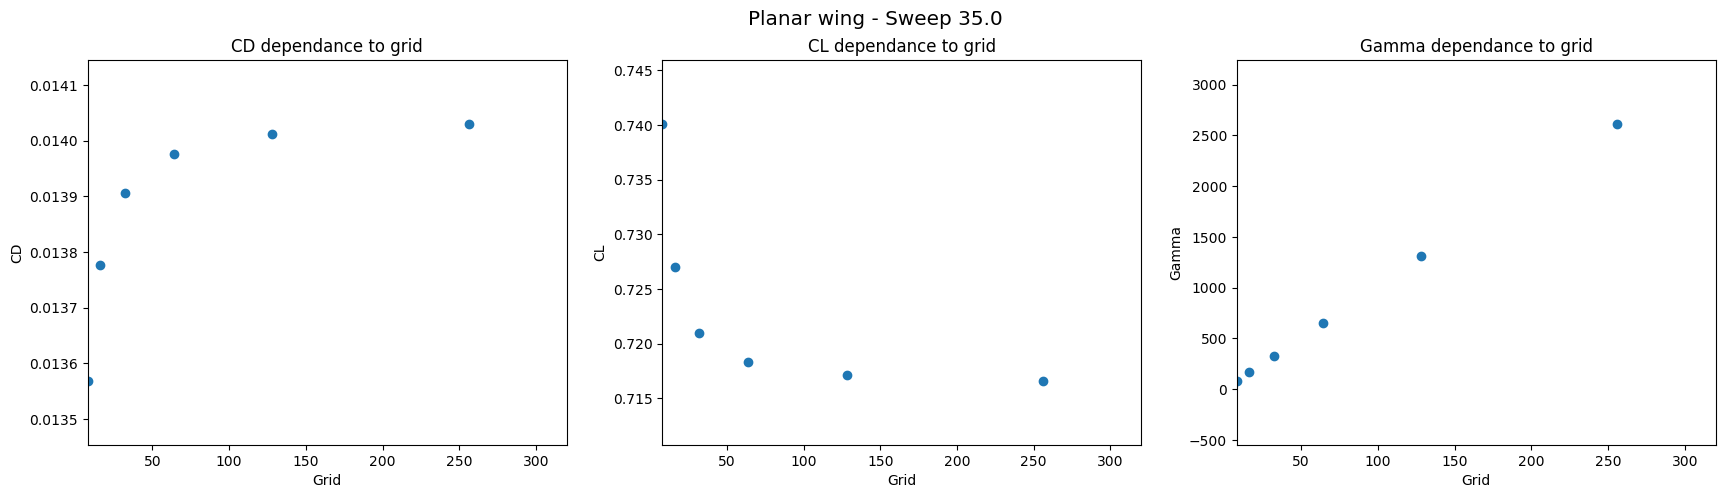


	PARAM	THEORETICAL	FLOWVLM		Error
	>CD	0.01781		0.01403		26.9%
	>CL	0.748		0.717		4.4%
	>L	1127.0		1080.0		4.4%
	>D	26.69		21.14		26.2%
###### Done



In [2]:
ver_planarWing();